**ogs@jupyter-lab: C process: Diffusion Reference Case**

<table><tr>
<td> <img src="ogs-workflows.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="icross-logo-ok.png" alt="Drawing" style="width: 100px;"/> </td>
</tr></table>

**Spatial Profiles**

R: 1.0
td: 40000000000000.0
td/t12: 0.5514746431959059
A: 0.03713066937169009
ts/td: 7.884e-05
B: 2.815572409997858
C: 0.00659380473395787
ts/td: 0.0007884
B: 0.8903621732722672
C: 0.020851441405707476
ts/td: 0.007884
B: 0.2815572409997858
C: 0.0659380473395787
ts/td: 0.07884
B: 0.08903621732722672
C: 0.20851441405707477
ts/td: 0.7884
B: 0.02815572409997858
C: 0.659380473395787


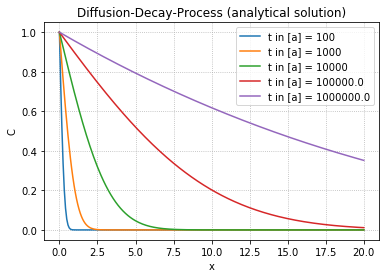

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

#Parameters
C0=1
D=1e-11
rho=2394 #kg/m3
Kd=0.5
Kd=0
porosity=0.12
R=1+(rho*Kd/porosity)
print('R:',R)
t12=2.3e+6 * 365*86400 #in seconds
L=20
td=L*L*R/D
print('td:',td)
print('td/t12:',td/t12)
l=np.log2(2)/t12
la=np.absolute(l)
#Time
years = (100,1000,10000,1e+5,1e+6)
#Geometry
N=250;x0=0.;xN=20;
x=np.linspace(x0,xN,N)
#Analytical solution
A=np.sqrt(la*R/D)
print('A:',A)
for t in years:
	ts=t*365*86400
	print('ts/td:',ts/td)
	B=C0/2*np.sqrt(R/D/ts)
	#B=0.5*np.sqrt(R/D/T)
	print('B:',B)
	C=np.sqrt(la*ts)
	print('C:',C)
	uexc=C0/2*(np.exp(-x*A)*special.erfc(x*B-C) + np.exp(x*A)*special.erfc(x*B+C))
	plt.plot(x,uexc,label="t in [a] = "+str(t))
#Plots 
plt.ylabel('C')
plt.xlabel('x')
plt.title('Diffusion-Decay-Process (analytical solution)')
plt.legend()
plt.grid(linestyle='dotted')
plt.show()
plt.savefig('reference-diffusion-decay.png',dpi=300)

**Temporal Profiles**

tdt12: (0, 1, 30, 120)
[1.00000000e-02 1.12332403e-02 1.26185688e-02 1.41747416e-02
 1.59228279e-02 1.78864953e-02 2.00923300e-02 2.25701972e-02
 2.53536449e-02 2.84803587e-02 3.19926714e-02 3.59381366e-02
 4.03701726e-02 4.53487851e-02 5.09413801e-02 5.72236766e-02
 6.42807312e-02 7.22080902e-02 8.11130831e-02 9.11162756e-02
 1.02353102e-01 1.14975700e-01 1.29154967e-01 1.45082878e-01
 1.62975083e-01 1.83073828e-01 2.05651231e-01 2.31012970e-01
 2.59502421e-01 2.91505306e-01 3.27454916e-01 3.67837977e-01
 4.13201240e-01 4.64158883e-01 5.21400829e-01 5.85702082e-01
 6.57933225e-01 7.39072203e-01 8.30217568e-01 9.32603347e-01
 1.04761575e+00 1.17681195e+00 1.32194115e+00 1.48496826e+00
 1.66810054e+00 1.87381742e+00 2.10490414e+00 2.36448941e+00
 2.65608778e+00 2.98364724e+00 3.35160265e+00 3.76493581e+00
 4.22924287e+00 4.75081016e+00 5.33669923e+00 5.99484250e+00
 6.73415066e+00 7.56463328e+00 8.49753436e+00 9.54548457e+00
 1.07226722e+01 1.20450354e+01 1.35304777e+01 1.51991108e+01
 

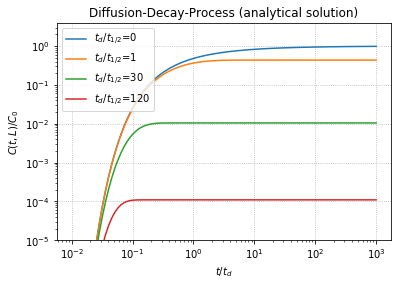

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

#Parameters
l2=np.log(2)
#tdt12=td/t12
tdt12=(0,1,30,120)
print('tdt12:',tdt12)
#ttd=t/td
ttd=np.logspace(-2,3,num=100)
print(ttd)
#Analytical solution
for t in tdt12:
	A=np.sqrt(t*l2)
	print('A:',A)
	#B=0.5*np.sqrt(1/ttd)
	B=0.5/np.sqrt(ttd)
	print('B:',B)
	C=np.sqrt(l2*ttd*t)
	print('C:',C)
	uexc=0.5*(np.exp(-A)*special.erfc(B-C) + np.exp(A)*special.erfc(B+C))
	print('uexc:',uexc)
	plt.plot(ttd,uexc,label="$t_d$/$t_{1/2}$="+str(t))

#Plots 
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-5)
plt.ylabel('$C(t,L)$/$C_0$')
plt.xlabel('$t$/$t_d$')
plt.title('Diffusion-Decay-Process (analytical solution)')
plt.legend()
plt.grid(linestyle='dotted')
plt.show()
plt.savefig('reference-diffusion-decay.png')#,dpi=300)

In [3]:
import time
print(time.ctime())

Sun Aug 15 17:44:48 2021


**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/
- project file: https://gitlab.opengeosys.org/garibay-j/ogs/-/tree/TracerThermalDiffusion
- notebook draft by OK: https://github.com/OlafKolditz/ogs-jupyter-lab

**Credits**
- Nagra: NTB 02-06: The reference case as well as the analytical framework was provided in this report
- NN for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc)
- Frameworks acknowledgements: OGS, Python, Jupyter, matplotlib